# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Modeling & Accuracy Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

## Importing Dataset

In [2]:
# reading and loading up dataset of .csv format
data = pd.read_csv("H2HBABBA2663.csv")
data[:10]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-09-03 00:00:00,2019.0,1.929764e+09,2019-08-20,20190819,20190820,20190904.0,USD,RV,1.0,NaN,33504.35,20190820.0,NAH4,1.929764e+09,0
1,U001,0200148860,DOLLA systems,2019-09-13 00:00:00,2019.0,1.929809e+09,2019-08-30,20190829,20190830,20190914.0,USD,RV,1.0,NaN,11715.92,20190830.0,NAA8,1.929809e+09,0
2,U001,0200705742,DOT systems,2019-04-05 00:00:00,2019.0,1.929005e+09,2019-03-21,20190321,20190321,20190410.0,USD,RV,1.0,NaN,15904.47,20190321.0,NAD1,1.929005e+09,0
3,U001,0200769623,WAL-MAR systems,2019-10-31 00:00:00,2019.0,1.930034e+09,2019-10-20,20191019,20191020,20191104.0,USD,RV,1.0,NaN,14944.64,20191020.0,NAH4,1.930034e+09,0
4,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930671e+09,2020-03-19,20200319,20200319,20200403.0,USD,RV,1.0,NaN,21287.87,20200319.0,NAH4,1.930671e+09,1
5,U001,0200792293,UNIFIE corp,2019-08-06 00:00:00,2019.0,1.929627e+09,2019-07-19,20190716,20190719,20190803.0,USD,RV,1.0,NaN,511.32,20190719.0,NAA8,1.929627e+09,0
6,U001,0200769623,WAL-MAR systems,2020-01-28 00:00:00,2020.0,1.930409e+09,2020-01-17,20200116,20200117,20200201.0,USD,RV,1.0,NaN,22694.67,20200117.0,NAH4,1.930409e+09,0
7,U001,0200743996,STATER corp,NaN,2020.0,1.930685e+09,2020-03-22,20200322,20200322,20200406.0,USD,RV,1.0,NaN,43462.04,20200322.0,NAA8,1.930685e+09,1
8,U001,0200769623,WAL-MAR co,2019-05-06 00:00:00,2019.0,1.929171e+09,2019-04-19,20190418,20190419,20190504.0,USD,RV,1.0,NaN,5139.70,20190419.0,NAH4,1.929171e+09,0
9,U001,0200769623,WAL-MAR foundation,2019-11-12 00:00:00,2019.0,1.930089e+09,2019-11-02,20191101,20191102,20191117.0,USD,RV,1.0,NaN,52918.59,20191102.0,NAH4,1.930089e+09,0


In [3]:
#first check datatypes of all columns in dataset
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

# Data preprocessing

## First we need to convert all dates into datetime format

In [4]:
data['clear_date'] = pd.to_datetime(data['clear_date']).dt.date
data['clear_date']= pd.to_datetime(data['clear_date'],format='%Y-%m-%d') 
data['document_create_date']= pd.to_datetime(data['document_create_date'],format='%Y%m%d') 
data['document_create_date.1']= pd.to_datetime(data['document_create_date.1'],format='%Y%m%d') 
data['due_in_date']= pd.to_datetime(data['due_in_date'],format='%Y%m%d') 
#data['posting_date']= pd.to_datetime(data['posting_date'],format='%Y-%m-%d') 
data['baseline_create_date']= pd.to_datetime(data['baseline_create_date'],format='%Y%m%d')
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [5]:
#number of unique data in each column
x = data.nunique(axis=0)
x

business_code                 6
cust_number                1393
name_customer              4160
clear_date                  395
buisness_year                 2
doc_id                    48865
posting_date                506
document_create_date        505
document_create_date.1      507
due_in_date                 549
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44414
baseline_create_date        510
cust_payment_terms           70
invoice_id                48858
isOpen                        2
dtype: int64

In [6]:
# count number of data for each columns.
data.count()

business_code             50000
cust_number               50000
name_customer             50000
clear_date                40000
buisness_year             50000
doc_id                    50000
posting_date              50000
document_create_date      50000
document_create_date.1    50000
due_in_date               50000
invoice_currency          50000
document type             50000
posting_id                50000
area_business                 0
total_open_amount         50000
baseline_create_date      50000
cust_payment_terms        50000
invoice_id                49993
isOpen                    50000
dtype: int64

In [7]:
# count number of nulldata for each columns.
data.isnull().sum()

# here we get the count of null values of clear_date column as 10000.

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [8]:
data['isOpen'].value_counts()
# here we get the count of isOpen = 1 as 10000.
# and both are present at same row number
#this means our final objective is to find values i.e. dates in place of null values in clear_date column where isOpen = 1.

0    40000
1    10000
Name: isOpen, dtype: int64

In [9]:
# here we are considering first 3 characters of cust_payment_terms so as to make classification easier in further stages
data['cust_payment_terms'] = data.cust_payment_terms.astype(str).str[:3]
byte = data['cust_payment_terms'].value_counts()
byte[5:22]

NAG    1651
NAD    1260
NAU    1018
NAV     750
NA3     725
NAX     595
NA1     437
NAW     299
NAB      52
CA3      27
C10      20
NA8      20
NAT      18
NA9      13
CAX       9
BR5       9
NA2       7
Name: cust_payment_terms, dtype: int64

## comparing data of doc_id and invoice_id

In [10]:
data['doc_id'].compare(data['invoice_id'])

,self,other
4918,9.500000e+09,NaN
10810,9.500000e+09,NaN
15815,9.500000e+09,NaN
23629,9.500000e+09,NaN
33333,9.500000e+09,NaN
40390,9.500000e+09,NaN
43969,9.500000e+09,NaN


### while comparing, we found all data of doc_id and invoice_id matches with each other except the 7 null values of invoice_id and on analysing the data of doc_id we found that those corresponding values of doc_id are equal to each other, do we will assign those values to the invoice_id where null is found.

In [11]:
data['invoice_id']=data['doc_id']

In [12]:
# comparing again to clarify there is no difference between two columns
data['doc_id'].compare(data['invoice_id'])

,self,other


In [13]:
# copying area_business from old to new data frame
null = {}
null_d=pd.DataFrame(null)
null_d['area_business'] = data['area_business']
null_d['posting_id'] = data['posting_id']
null_d['document type'] = data['document type']
null_d

,area_business,posting_id,document type
0,NaN,1.0,RV
1,NaN,1.0,RV
2,NaN,1.0,RV
3,NaN,1.0,RV
4,NaN,1.0,RV
...,...,...,...
49995,NaN,1.0,RV
49996,NaN,1.0,RV
49997,NaN,1.0,RV
49998,NaN,1.0,RV


In [14]:
#copied data has not been removed yet
data.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [15]:
# droping area_business from actual dataset
data.drop(columns = ['area_business'],axis=1,inplace=True)
data.drop(columns = ['doc_id','posting_id','document type'],axis=1,inplace=True)
data

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corporation,2019-09-03,2019.0,2019-08-20,2019-08-19,2019-08-20,2019-09-04,USD,33504.35,2019-08-20,NAH,1.929764e+09,0
1,U001,0200148860,DOLLA systems,2019-09-13,2019.0,2019-08-30,2019-08-29,2019-08-30,2019-09-14,USD,11715.92,2019-08-30,NAA,1.929809e+09,0
2,U001,0200705742,DOT systems,2019-04-05,2019.0,2019-03-21,2019-03-21,2019-03-21,2019-04-10,USD,15904.47,2019-03-21,NAD,1.929005e+09,0
3,U001,0200769623,WAL-MAR systems,2019-10-31,2019.0,2019-10-20,2019-10-19,2019-10-20,2019-11-04,USD,14944.64,2019-10-20,NAH,1.930034e+09,0
4,U001,0200769623,WAL-MAR foundation,NaT,2020.0,2020-03-19,2020-03-19,2020-03-19,2020-04-03,USD,21287.87,2020-03-19,NAH,1.930671e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR systems,NaT,2020.0,2020-04-03,2020-04-03,2020-04-03,2020-04-18,USD,11707.49,2020-04-03,NAH,1.930739e+09,1
49996,CA02,0140104440,SO associates,2019-04-24,2019.0,2019-03-21,2019-03-21,2019-03-21,2019-04-09,CAD,12140.43,2019-03-30,CA1,2.960537e+09,0
49997,CA02,140104409,LOB,2019-07-29,2019.0,2019-07-14,2019-07-14,2019-07-14,2019-07-24,CAD,321664.80,2019-07-14,CA1,2.960565e+09,0
49998,U001,0200769623,WAL-MAR us,2019-08-12,2019.0,2019-07-28,2019-07-28,2019-07-28,2019-08-12,USD,40540.91,2019-07-28,NAH,1.929671e+09,0


In [16]:
#converting business_year in int datatype
data['buisness_year'] = data['buisness_year'].astype(int)

### Now in cust_number we need to add leading zeros to a number to make all data into same 10 digit size

In [17]:
data['cust_number'] = data['cust_number'].apply(lambda x: x.zfill(10))

In [18]:
data["invoice_currency"].value_counts()

USD    46151
CAD     3849
Name: invoice_currency, dtype: int64

### On analysing above data, we can Binarize invoice_currency column as USD as 1 and CAD as 0.

In [19]:
data['invoice_currency'] = np.where(data['invoice_currency']=='USD',1,0)

### Similarly we can do this for buisness_year while making year 2020 as 1 and 2019 as 0.

In [20]:
data['buisness_year'] = data['buisness_year'].astype(int)

In [21]:
data['buisness_year'] = np.where(data['buisness_year']==2020,1,0)

In [22]:
# Now we need to sort data in ascending order in terms of posting_date
data.sort_values('posting_date',inplace = True)
data.reset_index(inplace=True,drop=True)

In [23]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200744019,TARG corporation,2019-01-18,0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,1372.00,2018-12-30,NAA,1.928541e+09,0
1,U001,0200744019,TARG llc,2019-01-22,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,53396.78,2018-12-30,NAA,1.928537e+09,0
2,U013,0140103480,PRIC corp,2019-02-14,0,2018-12-30,2018-12-28,2018-12-30,2019-02-13,1,15964.80,2018-12-30,NAV,1.991820e+09,0
3,U001,0200726979,BJ'S llc,2019-01-15,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,137.84,2018-12-30,NAA,1.928540e+09,0
4,CA02,0140105785,SHOPPE corporation,2019-01-18,0,2018-12-30,2018-12-30,2018-12-30,2019-01-12,0,6717.60,2019-01-02,CA1,2.960520e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200915438,GROC foundation,NaT,1,2020-05-15,2020-05-08,2020-05-15,2020-05-30,1,9144.00,2020-05-15,NAA,1.930880e+09,1
49996,U001,0200759878,SA associates,NaT,1,2020-05-17,2020-05-13,2020-05-17,2020-06-01,1,22835.50,2020-05-17,NAH,1.930897e+09,1
49997,U001,0200915438,GROC corp,NaT,1,2020-05-18,2020-05-16,2020-05-18,2020-06-02,1,9291.00,2020-05-18,NAA,1.930907e+09,1
49998,U001,0200763229,MAINES us,NaT,1,2020-05-19,2020-05-19,2020-05-19,2020-06-03,1,18506.94,2020-05-19,NAA,1.930917e+09,1


In [24]:
# seperating test dataset from main data
test = data[data['clear_date'].isnull()]
test.reset_index(inplace=True,drop=True)
test

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200795490,HY - co,NaT,1,2020-02-27,2020-02-28,2020-02-27,2020-03-13,1,47050.82,2020-02-27,NAA,1.930580e+09,1
1,U001,0200726979,BJ'S foundation,NaT,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,694.60,2020-02-27,NAA,1.930572e+09,1
2,U001,0200769623,WAL-MAR,NaT,1,2020-02-27,2020-02-24,2020-02-27,2020-03-13,1,14604.66,2020-02-27,NAH,1.930561e+09,1
3,U001,0200707822,PUBLI co,NaT,1,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,63885.28,2020-02-27,NAA,1.930579e+09,1
4,U001,0200769623,WAL-MAR co,NaT,1,2020-02-27,2020-02-25,2020-02-27,2020-03-13,1,53977.09,2020-02-27,NAH,1.930567e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200915438,GROC foundation,NaT,1,2020-05-15,2020-05-08,2020-05-15,2020-05-30,1,9144.00,2020-05-15,NAA,1.930880e+09,1
9996,U001,0200759878,SA associates,NaT,1,2020-05-17,2020-05-13,2020-05-17,2020-06-01,1,22835.50,2020-05-17,NAH,1.930897e+09,1
9997,U001,0200915438,GROC corp,NaT,1,2020-05-18,2020-05-16,2020-05-18,2020-06-02,1,9291.00,2020-05-18,NAA,1.930907e+09,1
9998,U001,0200763229,MAINES us,NaT,1,2020-05-19,2020-05-19,2020-05-19,2020-06-03,1,18506.94,2020-05-19,NAA,1.930917e+09,1


In [25]:
# seperating train dataset from main data
train = data[data['clear_date'].notnull()]
train.reset_index(inplace=True,drop=True)
train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200744019,TARG corporation,2019-01-18,0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,1372.00,2018-12-30,NAA,1.928541e+09,0
1,U001,0200744019,TARG llc,2019-01-22,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,53396.78,2018-12-30,NAA,1.928537e+09,0
2,U013,0140103480,PRIC corp,2019-02-14,0,2018-12-30,2018-12-28,2018-12-30,2019-02-13,1,15964.80,2018-12-30,NAV,1.991820e+09,0
3,U001,0200726979,BJ'S llc,2019-01-15,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,137.84,2018-12-30,NAA,1.928540e+09,0
4,CA02,0140105785,SHOPPE corporation,2019-01-18,0,2018-12-30,2018-12-30,2018-12-30,2019-01-12,0,6717.60,2019-01-02,CA1,2.960520e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200794332,COST trust,2020-03-12,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,10990.81,2020-02-27,NAA,1.930574e+09,0
39996,U001,0200721222,GO in,2020-03-13,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,6990.72,2020-02-27,NAA,1.930573e+09,0
39997,U001,0200290370,BARGAIN corp,2020-03-16,1,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,3599.97,2020-02-27,NAA,1.930577e+09,0
39998,U001,0200413833,LDC corp,2020-03-20,1,2020-02-27,2020-02-25,2020-02-27,2020-03-13,1,28311.65,2020-02-27,NAA,1.930566e+09,0


# Now we will work only on train data for a while

In [26]:
# shifting clear_date column to last for better understanding
cols_at_end = ['clear_date']
train = train[[c for c in train if c not in cols_at_end] 
        + [c for c in cols_at_end if c in train]]
train

,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,clear_date
0,U001,0200744019,TARG corporation,0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,1372.00,2018-12-30,NAA,1.928541e+09,0,2019-01-18
1,U001,0200744019,TARG llc,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,53396.78,2018-12-30,NAA,1.928537e+09,0,2019-01-22
2,U013,0140103480,PRIC corp,0,2018-12-30,2018-12-28,2018-12-30,2019-02-13,1,15964.80,2018-12-30,NAV,1.991820e+09,0,2019-02-14
3,U001,0200726979,BJ'S llc,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,137.84,2018-12-30,NAA,1.928540e+09,0,2019-01-15
4,CA02,0140105785,SHOPPE corporation,0,2018-12-30,2018-12-30,2018-12-30,2019-01-12,0,6717.60,2019-01-02,CA1,2.960520e+09,0,2019-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200794332,COST trust,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,10990.81,2020-02-27,NAA,1.930574e+09,0,2020-03-12
39996,U001,0200721222,GO in,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,6990.72,2020-02-27,NAA,1.930573e+09,0,2020-03-13
39997,U001,0200290370,BARGAIN corp,1,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,3599.97,2020-02-27,NAA,1.930577e+09,0,2020-03-16
39998,U001,0200413833,LDC corp,1,2020-02-27,2020-02-25,2020-02-27,2020-03-13,1,28311.65,2020-02-27,NAA,1.930566e+09,0,2020-03-20


In [27]:
# here we can drop isOpen column since all of data is going to be 0
train.drop(columns = ['isOpen'],axis=1,inplace=True)

C:\Users\91720\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int32
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                   int32
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
clear_date                datetime64[ns]
dtype: object

### Now we need days_past_duedate ( due_in_date - clear_date ) values which will be further predicted to get our final clear_dates

In [29]:
days_past_duedate = pd.to_datetime(train.due_in_date) - pd.to_datetime(train.clear_date)
days_past_duedate

0       -4 days
1       -8 days
2       -1 days
3       -1 days
4       -6 days
          ...  
39995    1 days
39996    0 days
39997   -3 days
39998   -7 days
39999    1 days
Length: 40000, dtype: timedelta64[ns]

In [30]:
# adding days_past_duedate to training data after and converting it into int datatype
train['days_past_duedate'] = days_past_duedate
train['days_past_duedate'] = (train['days_past_duedate'] / np.timedelta64(1,'D')).astype(int)
train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int32
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                   int32
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
clear_date                datetime64[ns]
days_past_duedate                  int32
dtype: object

In [31]:
train

,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,clear_date,days_past_duedate
0,U001,0200744019,TARG corporation,0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,1372.00,2018-12-30,NAA,1.928541e+09,2019-01-18,-4
1,U001,0200744019,TARG llc,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,53396.78,2018-12-30,NAA,1.928537e+09,2019-01-22,-8
2,U013,0140103480,PRIC corp,0,2018-12-30,2018-12-28,2018-12-30,2019-02-13,1,15964.80,2018-12-30,NAV,1.991820e+09,2019-02-14,-1
3,U001,0200726979,BJ'S llc,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,137.84,2018-12-30,NAA,1.928540e+09,2019-01-15,-1
4,CA02,0140105785,SHOPPE corporation,0,2018-12-30,2018-12-30,2018-12-30,2019-01-12,0,6717.60,2019-01-02,CA1,2.960520e+09,2019-01-18,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200794332,COST trust,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,10990.81,2020-02-27,NAA,1.930574e+09,2020-03-12,1
39996,U001,0200721222,GO in,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,6990.72,2020-02-27,NAA,1.930573e+09,2020-03-13,0
39997,U001,0200290370,BARGAIN corp,1,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,3599.97,2020-02-27,NAA,1.930577e+09,2020-03-16,-3
39998,U001,0200413833,LDC corp,1,2020-02-27,2020-02-25,2020-02-27,2020-03-13,1,28311.65,2020-02-27,NAA,1.930566e+09,2020-03-20,-7


In [32]:
# these are dump or recovery columns which may be used later and are stored in different dataframes
train_d=pd.DataFrame(null)
train_d['business_code'] = train['business_code']
train_d['cust_number'] = train['cust_number']
train_d['name_customer'] = train['name_customer']
train_d['posting_date'] = train['posting_date']
train_d['document_create_date'] = train['document_create_date']
train_d['document_create_date.1'] = train['document_create_date.1']
train_d['due_in_date'] = train['due_in_date']
train_d['baseline_create_date'] = train['baseline_create_date']
train_d['cust_payment_terms'] = train['cust_payment_terms']
train_d['clear_date'] = train['clear_date']
train_d['total_open_amount'] = train['total_open_amount']
train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int32
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                   int32
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
clear_date                datetime64[ns]
days_past_duedate                  int32
dtype: object

# EDA

In [33]:
# get total number of unique value of each field
x = train.nunique(axis=0)
x

business_code                 6
cust_number                1016
name_customer              3868
buisness_year                 2
posting_date                424
document_create_date        426
document_create_date.1      425
due_in_date                 494
invoice_currency              2
total_open_amount         35762
baseline_create_date        432
cust_payment_terms           30
invoice_id                39164
clear_date                  395
days_past_duedate           183
dtype: int64

# Outlier start

before outliers removal:


C:\Users\91720\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_past_duedate', ylabel='Density'>

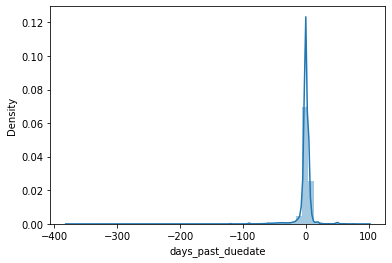

In [34]:
print("before outliers removal:")
sns.distplot(train['days_past_duedate'])

In [35]:
train['days_past_duedate'].describe()

count    40000.000000
mean        -0.964275
std         11.250109
min       -378.000000
25%         -2.000000
50%          0.000000
75%          3.000000
max         98.000000
Name: days_past_duedate, dtype: float64

In [36]:
indexNames = train[train['days_past_duedate'] >= 30].index
indexNames2 = train[train['days_past_duedate'] <= -60].index
indexNames

Int64Index([  411,   768,  1594,  3297,  3318,  3387,  3862,  3925,  3997,
             4037,
            ...
            39268, 39495, 39569, 39657, 39721, 39796, 39881, 39886, 39893,
            39963],
           dtype='int64', length=263)

In [37]:
indexNames2

Int64Index([  123,   178,   232,   666,   678,   779,   801,   863,   945,
             1093,
            ...
            37596, 37946, 38160, 38172, 38403, 38728, 39236, 39281, 39448,
            39824],
           dtype='int64', length=262)

In [38]:
train.drop(indexNames , inplace=True)
train.drop(indexNames2 , inplace=True)
train

,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,clear_date,days_past_duedate
0,U001,0200744019,TARG corporation,0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,1372.00,2018-12-30,NAA,1.928541e+09,2019-01-18,-4
1,U001,0200744019,TARG llc,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,53396.78,2018-12-30,NAA,1.928537e+09,2019-01-22,-8
2,U013,0140103480,PRIC corp,0,2018-12-30,2018-12-28,2018-12-30,2019-02-13,1,15964.80,2018-12-30,NAV,1.991820e+09,2019-02-14,-1
3,U001,0200726979,BJ'S llc,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,137.84,2018-12-30,NAA,1.928540e+09,2019-01-15,-1
4,CA02,0140105785,SHOPPE corporation,0,2018-12-30,2018-12-30,2018-12-30,2019-01-12,0,6717.60,2019-01-02,CA1,2.960520e+09,2019-01-18,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200794332,COST trust,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,10990.81,2020-02-27,NAA,1.930574e+09,2020-03-12,1
39996,U001,0200721222,GO in,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,6990.72,2020-02-27,NAA,1.930573e+09,2020-03-13,0
39997,U001,0200290370,BARGAIN corp,1,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,3599.97,2020-02-27,NAA,1.930577e+09,2020-03-16,-3
39998,U001,0200413833,LDC corp,1,2020-02-27,2020-02-25,2020-02-27,2020-03-13,1,28311.65,2020-02-27,NAA,1.930566e+09,2020-03-20,-7


after outliers removal:


C:\Users\91720\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_past_duedate', ylabel='Density'>

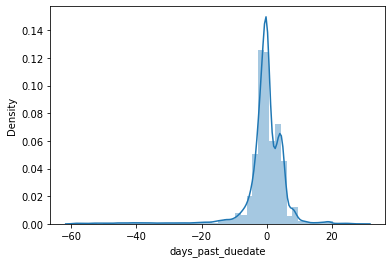

In [39]:
print("after outliers removal:")
sns.distplot(train['days_past_duedate'])

## Outliers have been removed

# Feature Engineering

### On analysing data of cust_number column, we got to know that the first five digit of data creates a pattern of individual entity. So, before label encoding cust_number column we need to seperate out those entities.

In [40]:
train['cust_number'] = train.cust_number.astype(str).str[:5]

## Label Encoding

### Now we need to do label encoding to make model work in a more efficient manner

In [41]:
print("before label encoding:")
train['cust_number'].value_counts()

before label encoding:


02007    26563
01401     3176
01000     1711
02004     1331
02009     1236
0000C     1200
02008      967
02003      709
02001      678
02005      601
02000      532
02002      523
02006      241
01400        7
Name: cust_number, dtype: int64

In [42]:
le1=LabelEncoder()
train["cust_number"] = le1.fit_transform(train["cust_number"])
# here we categorised 39163 records of cust_number into 14 categories 

In [43]:
print("after label encoding:")
train['cust_number'].value_counts()

after label encoding:


11    26563
3      3176
1      1711
8      1331
13     1236
0      1200
12      967
7       709
5       678
9       601
4       532
6       523
10      241
2         7
Name: cust_number, dtype: int64

In [44]:
print("before label encoding:")
train['business_code'].value_counts()

before label encoding:


U001    35772
CA02     3069
U013      497
U002      116
U005       18
U007        3
Name: business_code, dtype: int64

In [45]:
le2=LabelEncoder()
train["business_code"] = le2.fit_transform(train["business_code"])
# here we categorised 39163 records of cust_number into 6 categories 

In [46]:
print("after label encoding:")
train['business_code'].value_counts()

after label encoding:


1    35772
0     3069
5      497
2      116
3       18
4        3
Name: business_code, dtype: int64

In [47]:
print("before label encoding:")
train['cust_payment_terms'].value_counts()

before label encoding:


NAA    17149
NAH    10454
CA1     2998
NAM     1809
NAC     1464
NAD     1112
NAG     1097
NAU      824
NA3      636
NAV      629
NAX      515
NA1      367
NAW      256
NAB       38
CA3       27
C10       18
NAT       18
NA8       14
NA9       13
BR5        9
CAX        7
B11        4
B05        3
NAN        3
NA2        3
BR1        2
90M        2
MC1        2
CA6        1
CAB        1
Name: cust_payment_terms, dtype: int64

In [48]:
# merging values less than equal to 50 as code BBB
#train['cust_payment_terms'] = np.where((train.cust_payment_terms == 'NAX') | (train.cust_payment_terms == 'NAB') | (train.cust_payment_terms == 'CA3') | (train.cust_payment_terms == 'NAT') | (train.cust_payment_terms == 'C10') | (train.cust_payment_terms == 'NA8') | (train.cust_payment_terms == 'NA9') | (train.cust_payment_terms == 'BR5') | (train.cust_payment_terms == 'CAX') | (train.cust_payment_terms == 'B11') | (train.cust_payment_terms == 'NA2') | (train.cust_payment_terms == 'NAN') | (train.cust_payment_terms == 'B05') | (train.cust_payment_terms == '90M') | (train.cust_payment_terms == 'MC1') | (train.cust_payment_terms == 'BR1') | (train.cust_payment_terms == 'CAB') | (train.cust_payment_terms == 'CA6'),'BBB',train.cust_payment_terms)

In [49]:
print("before label encoding:")
train['cust_payment_terms'].value_counts()

before label encoding:


NAA    17149
NAH    10454
CA1     2998
NAM     1809
NAC     1464
NAD     1112
NAG     1097
NAU      824
NA3      636
NAV      629
NAX      515
NA1      367
NAW      256
NAB       38
CA3       27
C10       18
NAT       18
NA8       14
NA9       13
BR5        9
CAX        7
B11        4
B05        3
NAN        3
NA2        3
BR1        2
90M        2
MC1        2
CA6        1
CAB        1
Name: cust_payment_terms, dtype: int64

In [50]:
le3=LabelEncoder()
train["cust_payment_terms"] = le3.fit_transform(train["cust_payment_terms"])
# here we categorised 39163 records of cust_number into 30 categories 

In [51]:
print("after label encoding:")
train['cust_payment_terms'].value_counts()

after label encoding:


17    17149
22    10454
6      2998
23     1809
19     1464
20     1112
21     1097
26      824
14      636
27      629
29      515
12      367
28      256
18       38
7        27
5        18
25       18
15       14
16       13
4         9
10        7
2         4
1         3
13        3
24        3
11        2
3         2
0         2
9         1
8         1
Name: cust_payment_terms, dtype: int64

In [52]:
train

,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,clear_date,days_past_duedate
0,1,11,TARG corporation,0,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,1372.00,2018-12-30,17,1.928541e+09,2019-01-18,-4
1,1,11,TARG llc,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,53396.78,2018-12-30,17,1.928537e+09,2019-01-22,-8
2,5,3,PRIC corp,0,2018-12-30,2018-12-28,2018-12-30,2019-02-13,1,15964.80,2018-12-30,27,1.991820e+09,2019-02-14,-1
3,1,11,BJ'S llc,0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,137.84,2018-12-30,17,1.928540e+09,2019-01-15,-1
4,0,3,SHOPPE corporation,0,2018-12-30,2018-12-30,2018-12-30,2019-01-12,0,6717.60,2019-01-02,6,2.960520e+09,2019-01-18,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1,11,COST trust,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,10990.81,2020-02-27,17,1.930574e+09,2020-03-12,1
39996,1,11,GO in,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,6990.72,2020-02-27,17,1.930573e+09,2020-03-13,0
39997,1,6,BARGAIN corp,1,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,3599.97,2020-02-27,17,1.930577e+09,2020-03-16,-3
39998,1,8,LDC corp,1,2020-02-27,2020-02-25,2020-02-27,2020-03-13,1,28311.65,2020-02-27,17,1.930566e+09,2020-03-20,-7


In [53]:
train.dtypes

business_code                      int32
cust_number                        int32
name_customer                     object
buisness_year                      int32
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                   int32
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int32
invoice_id                       float64
clear_date                datetime64[ns]
days_past_duedate                  int32
dtype: object

In [54]:
# now we cann drop all date columns and name_customer column
train.drop(columns = ['name_customer','posting_date','invoice_id','document_create_date','document_create_date.1','due_in_date','baseline_create_date','clear_date','total_open_amount','buisness_year'],axis=1,inplace=True)

In [55]:
train

,business_code,cust_number,invoice_currency,cust_payment_terms,days_past_duedate
0,1,11,1,17,-4
1,1,11,1,17,-8
2,5,3,1,27,-1
3,1,11,1,17,-1
4,0,3,0,6,-6
...,...,...,...,...,...
39995,1,11,1,17,1
39996,1,11,1,17,0
39997,1,6,1,17,-3
39998,1,8,1,17,-7


In [56]:
train.isnull().sum()

business_code         0
cust_number           0
invoice_currency      0
cust_payment_terms    0
days_past_duedate     0
dtype: int64

# Split Train Data into Train/Validation/Test set

In [57]:
# Converting the main_train into x and y so that we can pass it onto train_test_split function

# x --> contains the dataframe without the target i.e days_past_duedate
x = train.drop('days_past_duedate',axis=1)

# y --> contains only the target value 
y = train['days_past_duedate']

In [58]:
# splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set and 70% to train set
# here, x_train,y_train = train set and x_inter_test,y_inter_test = intermediate set
x_train,x_inter_test,y_train,y_inter_test = train_test_split(x,y,test_size=0.3,random_state=0 , shuffle = False)

In [59]:
# Now splitting the data first into two part -- doing a 50:50 split i.e 50% data fed to validation data set and 50% to test set
# here, x_val,y_val = validation set and x_test,y_test = test set
x_val,x_test,y_val,y_test = train_test_split(x_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [60]:
x_test.shape

(5922, 4)

In [61]:
x_train.shape

(27632, 4)

In [62]:
x_val.shape

(5921, 4)

In [63]:
train.shape

(39475, 5)

C:\Users\91720\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_past_duedate', ylabel='Density'>

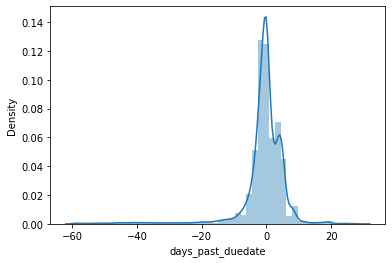

In [64]:
# distribution of the target column 
# left skewed distribution
sns.distplot(y_train)

In [65]:
# inserting predicted column to x_train dataset
x_train.merge(y_train,on = x_train.index)

,key_0,business_code,cust_number,invoice_currency,cust_payment_terms,days_past_duedate
0,0,1,11,1,17,-4
1,1,1,11,1,17,-8
2,2,5,3,1,27,-1
3,3,1,11,1,17,-1
4,4,0,3,0,6,-6
...,...,...,...,...,...,...
27627,28053,1,11,1,17,0
27628,28054,1,1,1,12,-7
27629,28055,1,11,1,22,5
27630,28056,0,3,0,6,-3


# Feature Selection

#### NOTE: Ignore key_0 column

<AxesSubplot:>

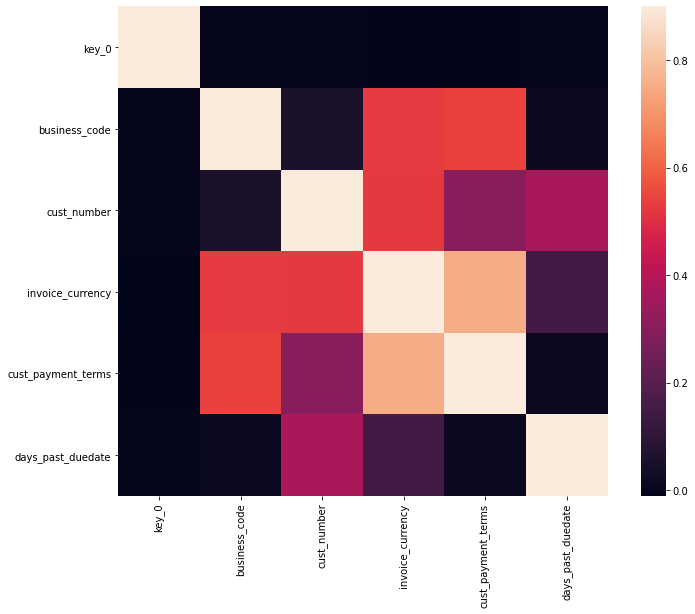

In [66]:
# visualisize heat map
corrmat = x_train.merge(y_train , on = x_train.index).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### NOTE: Ignore key_0 column

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

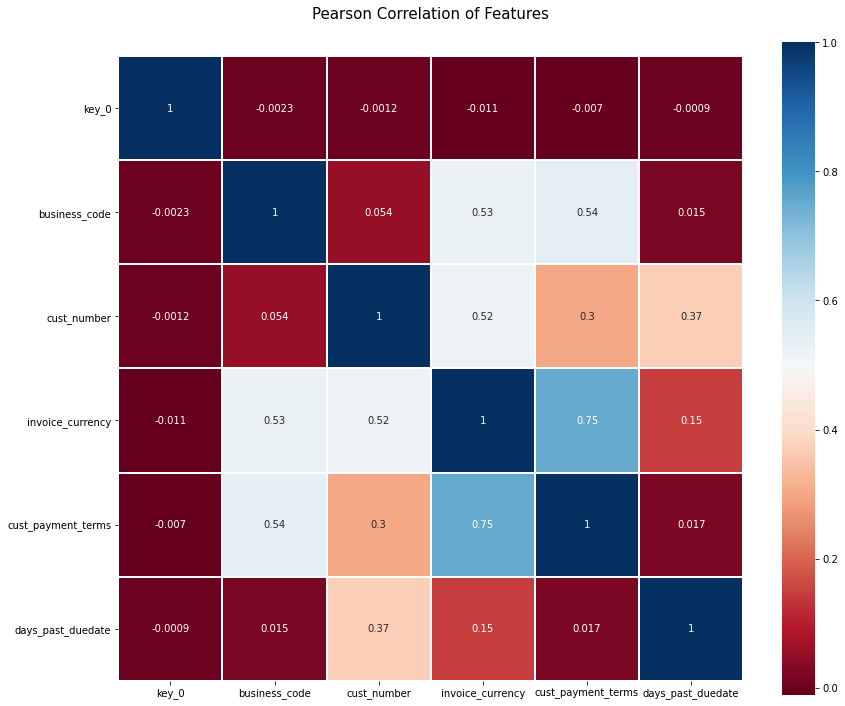

In [67]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [68]:
# also since all the columns have been converted to int/float, now we can use variance threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(x_train)

VarianceThreshold(threshold=0.8)

In [69]:
sel.variances_

array([ 0.29582451, 12.56946847,  0.07364377, 23.15384405])

# Modelling

## Creaing Base Model

## 1. Decision Tree

In [70]:
clf = DecisionTreeClassifier(random_state=0 , max_depth=6)

In [71]:
clf = clf.fit(x_train,y_train)

In [72]:
# prediction done on validation set
y_predt = clf.predict(x_val)
y_predt

array([0, 0, 0, ..., 5, 5, 5])

In [73]:
met1 = pd.DataFrame(zip(y_predt , y_val),columns=['Predicted','Actuals'])
met1

,Predicted,Actuals
0,0,24
1,0,0
2,0,0
3,0,-1
4,-1,-2
...,...,...
5916,0,-1
5917,5,4
5918,5,5
5919,5,5


In [74]:
x_test

,business_code,cust_number,invoice_currency,cust_payment_terms
33994,1,11,1,22
33995,1,11,1,22
33996,1,11,1,22
33997,1,11,1,22
33998,1,11,1,22
...,...,...,...,...
39995,1,11,1,17
39996,1,11,1,17
39997,1,6,1,17
39998,1,8,1,17


In [75]:
m1 = mean_squared_error(y_val, y_predt, squared=False)
m1

5.539802394719366

In [76]:
# prediction done on test set
y_predt_test = clf.predict(x_test)
y_predt_test

array([ 5,  5,  5, ...,  0,  0, -5])

In [77]:
t1 = mean_squared_error(y_test, y_predt_test, squared=False)
t1

5.897068230195741

In [78]:
x_test

,business_code,cust_number,invoice_currency,cust_payment_terms
33994,1,11,1,22
33995,1,11,1,22
33996,1,11,1,22
33997,1,11,1,22
33998,1,11,1,22
...,...,...,...,...
39995,1,11,1,17
39996,1,11,1,17
39997,1,6,1,17
39998,1,8,1,17


## 2. Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_train, y_train)

LinearRegression()

In [80]:
# prediction done on validation set
y_predr = base_model.predict(x_val)
y_predr

array([-1.49718682,  1.11818646,  1.11818646, ..., -0.07061958,
       -0.07061958, -0.07061958])

In [81]:
met2 = pd.DataFrame(zip(y_predr , y_val),columns=['Predicted','Actuals'])
met2

,Predicted,Actuals
0,-1.497187,24
1,1.118186,0
2,1.118186,0
3,-7.671474,-1
4,-4.446233,-2
...,...,...
5916,1.118186,-1
5917,-0.070620,4
5918,-0.070620,5
5919,-0.070620,5


In [82]:
m2 = mean_squared_error(y_val, y_predr, squared=False)
m2

6.407449940863679

In [83]:
# prediction done on test set
y_predr_test = base_model.predict(x_test)
y_predr_test

array([-0.07061958, -0.07061958, -0.07061958, ..., -3.27664381,
       -1.5187117 , -4.54346516])

In [84]:
t2 = mean_squared_error(y_test, y_predr_test, squared=False)
t2

7.167768762277361

In [85]:
met2t = pd.DataFrame(zip(y_predr_test , y_test),columns=['Predicted','Actuals'])
met2t

,Predicted,Actuals
0,-0.070620,4
1,-0.070620,3
2,-0.070620,5
3,-0.070620,-2
4,-0.070620,-2
...,...,...
5917,1.118186,1
5918,1.118186,0
5919,-3.276644,-3
5920,-1.518712,-7


## 3. Random Forest

In [86]:
# Fitting Random Forest Classifier to the Training Set
forestclassifier = RandomForestClassifier()
forestclassifier.fit(x_train, y_train)

RandomForestClassifier()

In [87]:
# prediction done on validation set
y_predf = forestclassifier.predict(x_val)
y_predf

array([0, 0, 0, ..., 5, 5, 5])

In [88]:
met3 = pd.DataFrame(zip(y_predf , y_val),columns=['Predicted','Actuals'])
met3

,Predicted,Actuals
0,0,24
1,0,0
2,0,0
3,0,-1
4,0,-2
...,...,...
5916,0,-1
5917,5,4
5918,5,5
5919,5,5


In [89]:
m3 = mean_squared_error(y_val, y_predf, squared=False)
m3

5.544145049845595

In [90]:
# prediction done on validation set
y_predf_test = forestclassifier.predict(x_test)
y_predf_test

array([ 5,  5,  5, ..., -1,  0, -5])

In [91]:
t3 = mean_squared_error(y_test, y_predf_test, squared=False)
t3

5.938784877595526

In [92]:
met3t = pd.DataFrame(zip(y_predf_test , y_test),columns=['Predicted','Actuals'])
met3t

,Predicted,Actuals
0,5,4
1,5,3
2,5,5
3,5,-2
4,5,-2
...,...,...
5917,0,1
5918,0,0
5919,-1,-3
5920,0,-7


## 4. XGBoost

In [93]:
# Fitting XGBoost to the Training Set
xgbclassifier = XGBClassifier()
xgbclassifier.fit(x_train, y_train)

C:\Users\91720\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
x_val

,business_code,cust_number,invoice_currency,cust_payment_terms
28058,1,11,1,28
28059,1,11,1,17
28060,1,11,1,17
28061,1,1,1,17
28062,5,3,1,27
...,...,...,...,...
33989,1,11,1,17
33990,1,11,1,22
33991,1,11,1,22
33992,1,11,1,22


In [95]:
# prediction done on validation set
y_predx = xgbclassifier.predict(x_val)
y_predx

array([0, 0, 0, ..., 5, 5, 5])

In [96]:
met4 = pd.DataFrame(zip(y_predx , y_val),columns=['Predicted','Actuals'])
met4

,Predicted,Actuals
0,0,24
1,0,0
2,0,0
3,0,-1
4,0,-2
...,...,...
5916,0,-1
5917,5,4
5918,5,5
5919,5,5


In [97]:
m4 = mean_squared_error(y_val, y_predx, squared=False)
m4

5.529747897096057

In [98]:
# prediction done on test set
y_predx_test = xgbclassifier.predict(x_test)
y_predx_test

array([ 5,  5,  5, ..., -1,  0, -5])

In [99]:
t4 = mean_squared_error(y_test, y_predx_test, squared=False)
t4

5.9118110846486065

In [100]:
met4t = pd.DataFrame(zip(y_predx_test , y_test),columns=['Predicted','Actuals'])
met4t

,Predicted,Actuals
0,5,4
1,5,3
2,5,5
3,5,-2
4,5,-2
...,...,...
5917,0,1
5918,0,0
5919,-1,-3
5920,0,-7


# Finally

In [101]:
print("RMS values For Validation:")
print("Decision Tree =",m1)
print("Linear Regression =",m2)
print("Random Forest =",m3)
print("XGBoost =",m4)
print()
print("RMS values For Test:")
print("Decision Tree =",t1)
print("Linear Regression =",t2)
print("Random Forest =",t3)
print("XGBoost =",t4)

RMS values For Validation:
Decision Tree = 5.539802394719366
Linear Regression = 6.407449940863679
Random Forest = 5.544145049845595
XGBoost = 5.529747897096057

RMS values For Test:
Decision Tree = 5.897068230195741
Linear Regression = 7.167768762277361
Random Forest = 5.938784877595526
XGBoost = 5.9118110846486065


### So after comparing all rms values of various models, the XGBoost model gives best result and it will used for final prediction

In [102]:
train

,business_code,cust_number,invoice_currency,cust_payment_terms,days_past_duedate
0,1,11,1,17,-4
1,1,11,1,17,-8
2,5,3,1,27,-1
3,1,11,1,17,-1
4,0,3,0,6,-6
...,...,...,...,...,...
39995,1,11,1,17,1
39996,1,11,1,17,0
39997,1,6,1,17,-3
39998,1,8,1,17,-7


In [103]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200795490,HY - co,NaT,1,2020-02-27,2020-02-28,2020-02-27,2020-03-13,1,47050.82,2020-02-27,NAA,1.930580e+09,1
1,U001,0200726979,BJ'S foundation,NaT,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,694.60,2020-02-27,NAA,1.930572e+09,1
2,U001,0200769623,WAL-MAR,NaT,1,2020-02-27,2020-02-24,2020-02-27,2020-03-13,1,14604.66,2020-02-27,NAH,1.930561e+09,1
3,U001,0200707822,PUBLI co,NaT,1,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,63885.28,2020-02-27,NAA,1.930579e+09,1
4,U001,0200769623,WAL-MAR co,NaT,1,2020-02-27,2020-02-25,2020-02-27,2020-03-13,1,53977.09,2020-02-27,NAH,1.930567e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200915438,GROC foundation,NaT,1,2020-05-15,2020-05-08,2020-05-15,2020-05-30,1,9144.00,2020-05-15,NAA,1.930880e+09,1
9996,U001,0200759878,SA associates,NaT,1,2020-05-17,2020-05-13,2020-05-17,2020-06-01,1,22835.50,2020-05-17,NAH,1.930897e+09,1
9997,U001,0200915438,GROC corp,NaT,1,2020-05-18,2020-05-16,2020-05-18,2020-06-02,1,9291.00,2020-05-18,NAA,1.930907e+09,1
9998,U001,0200763229,MAINES us,NaT,1,2020-05-19,2020-05-19,2020-05-19,2020-06-03,1,18506.94,2020-05-19,NAA,1.930917e+09,1


In [104]:
Final_test = test
Final_test

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200795490,HY - co,NaT,1,2020-02-27,2020-02-28,2020-02-27,2020-03-13,1,47050.82,2020-02-27,NAA,1.930580e+09,1
1,U001,0200726979,BJ'S foundation,NaT,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,694.60,2020-02-27,NAA,1.930572e+09,1
2,U001,0200769623,WAL-MAR,NaT,1,2020-02-27,2020-02-24,2020-02-27,2020-03-13,1,14604.66,2020-02-27,NAH,1.930561e+09,1
3,U001,0200707822,PUBLI co,NaT,1,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,63885.28,2020-02-27,NAA,1.930579e+09,1
4,U001,0200769623,WAL-MAR co,NaT,1,2020-02-27,2020-02-25,2020-02-27,2020-03-13,1,53977.09,2020-02-27,NAH,1.930567e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200915438,GROC foundation,NaT,1,2020-05-15,2020-05-08,2020-05-15,2020-05-30,1,9144.00,2020-05-15,NAA,1.930880e+09,1
9996,U001,0200759878,SA associates,NaT,1,2020-05-17,2020-05-13,2020-05-17,2020-06-01,1,22835.50,2020-05-17,NAH,1.930897e+09,1
9997,U001,0200915438,GROC corp,NaT,1,2020-05-18,2020-05-16,2020-05-18,2020-06-02,1,9291.00,2020-05-18,NAA,1.930907e+09,1
9998,U001,0200763229,MAINES us,NaT,1,2020-05-19,2020-05-19,2020-05-19,2020-06-03,1,18506.94,2020-05-19,NAA,1.930917e+09,1


In [105]:
# shifting clear_date column to last for better understanding
cols_at_end = ['clear_date']
test = test[[c for c in test if c not in cols_at_end] 
        + [c for c in cols_at_end if c in test]]

In [106]:
main_test = test

In [107]:
# now we cann drop all date columns and name_customer column
main_test.drop(columns = ['name_customer','buisness_year','posting_date','document_create_date','document_create_date.1','due_in_date','baseline_create_date','clear_date','total_open_amount'],axis=1,inplace=True)

C:\Users\91720\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [108]:
main_test

,business_code,cust_number,invoice_currency,cust_payment_terms,invoice_id,isOpen
0,U001,0200795490,1,NAA,1.930580e+09,1
1,U001,0200726979,1,NAA,1.930572e+09,1
2,U001,0200769623,1,NAH,1.930561e+09,1
3,U001,0200707822,1,NAA,1.930579e+09,1
4,U001,0200769623,1,NAH,1.930567e+09,1
...,...,...,...,...,...,...
9995,U001,0200915438,1,NAA,1.930880e+09,1
9996,U001,0200759878,1,NAH,1.930897e+09,1
9997,U001,0200915438,1,NAA,1.930907e+09,1
9998,U001,0200763229,1,NAA,1.930917e+09,1


In [109]:
main_test['business_code'].value_counts()

U001    9210
CA02     700
U013      61
U002      24
U005       5
Name: business_code, dtype: int64

In [110]:
train['business_code'].value_counts()

1    35772
0     3069
5      497
2      116
3       18
4        3
Name: business_code, dtype: int64

In [111]:
main_test['cust_number'] = main_test.cust_number.astype(str).str[:5]

<ipython-input-111-719353a16f80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_test['cust_number'] = main_test.cust_number.astype(str).str[:5]


In [112]:
main_test

,business_code,cust_number,invoice_currency,cust_payment_terms,invoice_id,isOpen
0,U001,02007,1,NAA,1.930580e+09,1
1,U001,02007,1,NAA,1.930572e+09,1
2,U001,02007,1,NAH,1.930561e+09,1
3,U001,02007,1,NAA,1.930579e+09,1
4,U001,02007,1,NAH,1.930567e+09,1
...,...,...,...,...,...,...
9995,U001,02009,1,NAA,1.930880e+09,1
9996,U001,02007,1,NAH,1.930897e+09,1
9997,U001,02009,1,NAA,1.930907e+09,1
9998,U001,02007,1,NAA,1.930917e+09,1


# Label Encoding

## Now we need to do label encoding according to our previous encoded format to make our model work.

In [113]:
print("before label encoding:")
train['cust_number'].value_counts()
# here we categorised 39163 records of cust_number into 14 categories 

before label encoding:


11    26563
3      3176
1      1711
8      1331
13     1236
0      1200
12      967
7       709
5       678
9       601
4       532
6       523
10      241
2         7
Name: cust_number, dtype: int64

In [114]:
print("before label encoding:")
main_test['cust_number'].value_counts()
# here we categorised 39163 records of cust_number into 14 categories 

before label encoding:


02007    7282
01401     712
01000     379
02004     347
02009     240
02008     211
02001     185
02003     144
02002     128
02005     125
0000C     110
02000     100
02006      34
01400       3
Name: cust_number, dtype: int64

In [115]:
main_test

,business_code,cust_number,invoice_currency,cust_payment_terms,invoice_id,isOpen
0,U001,02007,1,NAA,1.930580e+09,1
1,U001,02007,1,NAA,1.930572e+09,1
2,U001,02007,1,NAH,1.930561e+09,1
3,U001,02007,1,NAA,1.930579e+09,1
4,U001,02007,1,NAH,1.930567e+09,1
...,...,...,...,...,...,...
9995,U001,02009,1,NAA,1.930880e+09,1
9996,U001,02007,1,NAH,1.930897e+09,1
9997,U001,02009,1,NAA,1.930907e+09,1
9998,U001,02007,1,NAA,1.930917e+09,1


In [116]:
main_test["cust_number"] = le1.fit_transform(main_test["cust_number"])

<ipython-input-116-1baff26de60a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_test["cust_number"] = le1.fit_transform(main_test["cust_number"])


In [117]:
print("after label encoding:")
train['cust_number'].value_counts()

after label encoding:


11    26563
3      3176
1      1711
8      1331
13     1236
0      1200
12      967
7       709
5       678
9       601
4       532
6       523
10      241
2         7
Name: cust_number, dtype: int64

In [118]:
print("after label encoding:")
main_test['cust_number'].value_counts()

after label encoding:


11    7282
3      712
1      379
8      347
13     240
12     211
5      185
7      144
6      128
9      125
0      110
4      100
10      34
2        3
Name: cust_number, dtype: int64

In [119]:
print("before label encoding:")
main_test['business_code'].value_counts()

before label encoding:


U001    9210
CA02     700
U013      61
U002      24
U005       5
Name: business_code, dtype: int64

In [120]:
main_test["business_code"] = le2.fit_transform(main_test["business_code"])

<ipython-input-120-88f5099a5fb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_test["business_code"] = le2.fit_transform(main_test["business_code"])


In [121]:
print("after label encoding:")
main_test['business_code'].value_counts()

after label encoding:


1    9210
0     700
4      61
2      24
3       5
Name: business_code, dtype: int64

In [122]:
print("before label encoding:")
main_test['cust_payment_terms'].value_counts()

before label encoding:


NAA    4431
NAH    3004
CA1     697
NAC     457
NAM     419
NAG     356
NAU     190
NAD     139
NA3      79
NA1      67
NAV      60
NAX      57
NAW      16
NAB      14
NA8       5
NA2       4
C10       2
BR1       1
CAB       1
CAX       1
Name: cust_payment_terms, dtype: int64

In [123]:
main_test["cust_payment_terms"] = le3.fit_transform(main_test["cust_payment_terms"])

<ipython-input-123-76ed7f0cfc6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_test["cust_payment_terms"] = le3.fit_transform(main_test["cust_payment_terms"])


In [124]:
print("after label encoding:")
train['cust_payment_terms'].value_counts()

after label encoding:


17    17149
22    10454
6      2998
23     1809
19     1464
20     1112
21     1097
26      824
14      636
27      629
29      515
12      367
28      256
18       38
7        27
5        18
25       18
15       14
16       13
4         9
10        7
2         4
1         3
13        3
24        3
11        2
3         2
0         2
9         1
8         1
Name: cust_payment_terms, dtype: int64

In [125]:
main_test

,business_code,cust_number,invoice_currency,cust_payment_terms,invoice_id,isOpen
0,1,11,1,9,1.930580e+09,1
1,1,11,1,9,1.930572e+09,1
2,1,11,1,14,1.930561e+09,1
3,1,11,1,9,1.930579e+09,1
4,1,11,1,14,1.930567e+09,1
...,...,...,...,...,...,...
9995,1,13,1,9,1.930880e+09,1
9996,1,11,1,14,1.930897e+09,1
9997,1,13,1,9,1.930907e+09,1
9998,1,11,1,9,1.930917e+09,1


In [126]:
train

,business_code,cust_number,invoice_currency,cust_payment_terms,days_past_duedate
0,1,11,1,17,-4
1,1,11,1,17,-8
2,5,3,1,27,-1
3,1,11,1,17,-1
4,0,3,0,6,-6
...,...,...,...,...,...
39995,1,11,1,17,1
39996,1,11,1,17,0
39997,1,6,1,17,-3
39998,1,8,1,17,-7


In [127]:
test

,business_code,cust_number,invoice_currency,cust_payment_terms,invoice_id,isOpen
0,1,11,1,9,1.930580e+09,1
1,1,11,1,9,1.930572e+09,1
2,1,11,1,14,1.930561e+09,1
3,1,11,1,9,1.930579e+09,1
4,1,11,1,14,1.930567e+09,1
...,...,...,...,...,...,...
9995,1,13,1,9,1.930880e+09,1
9996,1,11,1,14,1.930897e+09,1
9997,1,13,1,9,1.930907e+09,1
9998,1,11,1,9,1.930917e+09,1


# Now, Final Prediction Part.......

In [128]:
X_main_test = main_test
X_main_test.drop(columns = ['isOpen','invoice_id'],axis=1,inplace=True)
X_main_test

C:\Users\91720\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,invoice_currency,cust_payment_terms
0,1,11,1,9
1,1,11,1,9
2,1,11,1,14
3,1,11,1,9
4,1,11,1,14
...,...,...,...,...
9995,1,13,1,9
9996,1,11,1,14
9997,1,13,1,9
9998,1,11,1,9


In [129]:
x_val

,business_code,cust_number,invoice_currency,cust_payment_terms
28058,1,11,1,28
28059,1,11,1,17
28060,1,11,1,17
28061,1,1,1,17
28062,5,3,1,27
...,...,...,...,...
33989,1,11,1,17
33990,1,11,1,22
33991,1,11,1,22
33992,1,11,1,22


In [130]:
final_result = xgbclassifier.predict(X_main_test)

In [131]:
final_result = pd.Series(final_result,name='days_past_duedate')

In [132]:
# resetting the index of main test so that we can merge days_past_duedate series with it
main_test.reset_index(drop=True,inplace=True)

In [133]:
main_test

,business_code,cust_number,invoice_currency,cust_payment_terms
0,1,11,1,9
1,1,11,1,9
2,1,11,1,14
3,1,11,1,9
4,1,11,1,14
...,...,...,...,...
9995,1,13,1,9
9996,1,11,1,14
9997,1,13,1,9
9998,1,11,1,9


In [134]:
decimals = 0
final_result = final_result.apply(lambda x: round(x, decimals)).astype(int)
final_result

0       0
1       0
2      -2
3       0
4      -2
       ..
9995   -9
9996   -2
9997   -9
9998    0
9999   -2
Name: days_past_duedate, Length: 10000, dtype: int32

In [135]:
Final = Final_test.merge(final_result , on = Final_test.index )
Final[100:200] 

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,days_past_duedate
100,100,CA02,0140104429,COSTCO trust,NaT,1,2020-02-27,2020-02-27,2020-02-27,2020-03-09,0,14677.22,2020-02-28,CA1,2.960617e+09,1,0
101,101,U001,0100043921,NASS corporation,NaT,1,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,6355.80,2020-02-27,NAA,1.930577e+09,1,3
102,102,CA02,0140104429,COSTCO foundation,NaT,1,2020-02-27,2020-02-27,2020-02-27,2020-03-09,0,11006.92,2020-02-28,CA1,2.960617e+09,1,0
103,103,U001,0200726979,BJ'S,NaT,1,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,643.52,2020-02-27,NAA,1.930572e+09,1,0
104,104,U001,0200799367,MCL in,NaT,1,2020-02-27,2020-02-21,2020-02-27,2020-03-13,1,13867.36,2020-02-27,NAA,1.930554e+09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,U001,0200769623,WAL-MAR llc,NaT,1,2020-02-28,2020-02-27,2020-02-28,2020-03-14,1,7521.63,2020-02-28,NAH,1.930579e+09,1,-2
196,196,U001,0200900909,SYSCO us,NaT,1,2020-02-28,2020-02-29,2020-02-28,2020-03-14,1,33963.07,2020-02-28,NAA,1.930583e+09,1,-9
197,197,U001,0000CCCA02,KRAFT corporation,NaT,1,2020-02-28,2020-02-27,2020-02-28,2020-04-03,1,56165.76,2020-02-28,NAG,1.930577e+09,1,0
198,198,U001,0200744019,TARG co,NaT,1,2020-02-28,2020-02-27,2020-02-28,2020-03-14,1,8078.47,2020-02-28,NAA,1.930577e+09,1,0


## hence adding due_in_date with days_past_duedate to get the desired output i.e. Clear_date


In [136]:
Final['clear_date'] = Final['due_in_date'] + pd.to_timedelta(Final['days_past_duedate'], unit='d')

In [137]:
# shifting clear_date column to last for better understanding
cols_at_end = ['clear_date']
Final = Final[[c for c in Final if c not in cols_at_end] 
        + [c for c in cols_at_end if c in Final]]
Final.dtypes

key_0                              int64
business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int32
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                   int32
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
days_past_duedate                  int32
clear_date                datetime64[ns]
dtype: object

In [138]:
Final['days_past_duedate'].value_counts()

 0     4303
-2     3344
 3      616
-6      486
-12     229
-9      226
 8      188
 2      145
-3      130
-8      107
-4       81
 4       80
 7       53
-1        6
 6        3
-27       2
-10       1
Name: days_past_duedate, dtype: int64

In [139]:
Final[300:310]

,key_0,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,days_past_duedate,clear_date
300,300,U001,0200769623,WAL-MAR associates,1,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,15500.83,2020-02-29,NAH,1.930579e+09,1,-2,2020-03-13
301,301,U001,0200769623,WAL-MAR llc,1,2020-02-29,2020-02-28,2020-02-29,2020-03-15,1,49987.50,2020-02-29,NAH,1.930581e+09,1,-2,2020-03-13
302,302,CA02,0140104409,LOB co,1,2020-02-29,2020-02-29,2020-02-29,2020-03-12,0,226164.28,2020-03-02,CA1,2.960614e+09,1,0,2020-03-12
303,303,U001,0200769623,WAL-MAR foundation,1,2020-02-29,2020-02-29,2020-02-29,2020-03-15,1,6323.55,2020-02-29,NAH,1.930584e+09,1,-2,2020-03-13
304,304,U001,0200769623,WAL-MAR us,1,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,1898.20,2020-02-29,NAH,1.930580e+09,1,-2,2020-03-13
305,305,U001,0200555117,BURR trust,1,2020-02-29,2020-02-28,2020-02-29,2020-03-15,1,95136.82,2020-02-29,NAA,1.930583e+09,1,3,2020-03-18
306,306,U001,0200769623,WAL-MAR corp,1,2020-02-29,2020-02-28,2020-02-29,2020-03-15,1,17350.89,2020-02-29,NAH,1.930581e+09,1,-2,2020-03-13
307,307,U001,0200759878,SA systems,1,2020-02-29,2020-02-28,2020-02-29,2020-03-15,1,25049.84,2020-02-29,NAH,1.930582e+09,1,-2,2020-03-13
308,308,U001,0200705742,DOT us,1,2020-02-29,2020-02-29,2020-02-29,2020-04-01,1,36966.70,2020-02-29,NA3,1.930584e+09,1,0,2020-04-01
309,309,U001,0200769623,WAL-MAR systems,1,2020-02-29,2020-02-28,2020-02-29,2020-03-15,1,35480.39,2020-02-29,NAH,1.930583e+09,1,-2,2020-03-13


In [140]:
Final["AgingBucket"]=Final["days_past_duedate"]

In [141]:
# create aging bucket
d = {range(-200, -1): "<0", range(-1, 15): "0-15", range(15, 30): "16-30",range(30, 45): "31-45",range(15, 30): "46-60"}
Final['AgingBucket'] = Final['days_past_duedate'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))

In [142]:
Final['invoice_currency'] = np.where(Final['invoice_currency']==1,'USD','CAD')

In [143]:
Final['buisness_year'] = np.where(Final['buisness_year']==1,2020,2019)

In [144]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,days_past_duedate,clear_date,AgingBucket
0,0,U001,0200795490,HY - co,2020,2020-02-27,2020-02-28,2020-02-27,2020-03-13,USD,47050.82,2020-02-27,NAA,1.930580e+09,1,0,2020-03-13,0-15
1,1,U001,0200726979,BJ'S foundation,2020,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,694.60,2020-02-27,NAA,1.930572e+09,1,0,2020-03-13,0-15
2,2,U001,0200769623,WAL-MAR,2020,2020-02-27,2020-02-24,2020-02-27,2020-03-13,USD,14604.66,2020-02-27,NAH,1.930561e+09,1,-2,2020-03-11,<0
3,3,U001,0200707822,PUBLI co,2020,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,63885.28,2020-02-27,NAA,1.930579e+09,1,0,2020-03-13,0-15
4,4,U001,0200769623,WAL-MAR co,2020,2020-02-27,2020-02-25,2020-02-27,2020-03-13,USD,53977.09,2020-02-27,NAH,1.930567e+09,1,-2,2020-03-11,<0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,U001,0200915438,GROC foundation,2020,2020-05-15,2020-05-08,2020-05-15,2020-05-30,USD,9144.00,2020-05-15,NAA,1.930880e+09,1,-9,2020-05-21,<0
9996,9996,U001,0200759878,SA associates,2020,2020-05-17,2020-05-13,2020-05-17,2020-06-01,USD,22835.50,2020-05-17,NAH,1.930897e+09,1,-2,2020-05-30,<0
9997,9997,U001,0200915438,GROC corp,2020,2020-05-18,2020-05-16,2020-05-18,2020-06-02,USD,9291.00,2020-05-18,NAA,1.930907e+09,1,-9,2020-05-24,<0
9998,9998,U001,0200763229,MAINES us,2020,2020-05-19,2020-05-19,2020-05-19,2020-06-03,USD,18506.94,2020-05-19,NAA,1.930917e+09,1,0,2020-06-03,0-15


In [145]:
Final.to_csv(r'C:\Users\91720\Final_test.csv')

In [146]:
print("Test Set Successfully Predicted and Exported !!!")

Test Set Successfully Predicted and Exported !!!


In [147]:
Final.drop(columns = ['key_0','business_code','buisness_year','posting_date','document_create_date','document_create_date.1','invoice_currency','baseline_create_date','cust_payment_terms','isOpen','days_past_duedate','AgingBucket'],axis=1,inplace=True)

In [148]:
Final

,cust_number,name_customer,due_in_date,total_open_amount,invoice_id,clear_date
0,0200795490,HY - co,2020-03-13,47050.82,1.930580e+09,2020-03-13
1,0200726979,BJ'S foundation,2020-03-13,694.60,1.930572e+09,2020-03-13
2,0200769623,WAL-MAR,2020-03-13,14604.66,1.930561e+09,2020-03-11
3,0200707822,PUBLI co,2020-03-13,63885.28,1.930579e+09,2020-03-13
4,0200769623,WAL-MAR co,2020-03-13,53977.09,1.930567e+09,2020-03-11
...,...,...,...,...,...,...
9995,0200915438,GROC foundation,2020-05-30,9144.00,1.930880e+09,2020-05-21
9996,0200759878,SA associates,2020-06-01,22835.50,1.930897e+09,2020-05-30
9997,0200915438,GROC corp,2020-06-02,9291.00,1.930907e+09,2020-05-24
9998,0200763229,MAINES us,2020-06-03,18506.94,1.930917e+09,2020-06-03


In [149]:
Final['Notes'] = Final.apply(lambda _: '', axis=1)

In [150]:
Final

,cust_number,name_customer,due_in_date,total_open_amount,invoice_id,clear_date,Notes
0,0200795490,HY - co,2020-03-13,47050.82,1.930580e+09,2020-03-13,
1,0200726979,BJ'S foundation,2020-03-13,694.60,1.930572e+09,2020-03-13,
2,0200769623,WAL-MAR,2020-03-13,14604.66,1.930561e+09,2020-03-11,
3,0200707822,PUBLI co,2020-03-13,63885.28,1.930579e+09,2020-03-13,
4,0200769623,WAL-MAR co,2020-03-13,53977.09,1.930567e+09,2020-03-11,
...,...,...,...,...,...,...,...
9995,0200915438,GROC foundation,2020-05-30,9144.00,1.930880e+09,2020-05-21,
9996,0200759878,SA associates,2020-06-01,22835.50,1.930897e+09,2020-05-30,
9997,0200915438,GROC corp,2020-06-02,9291.00,1.930907e+09,2020-05-24,
9998,0200763229,MAINES us,2020-06-03,18506.94,1.930917e+09,2020-06-03,


In [151]:
cols_at_end = ['name_customer']
Final = Final[[c for c in Final if c not in cols_at_end] 
        + [c for c in cols_at_end if c in Final]]
cols_at_end = ['cust_number']
Final = Final[[c for c in Final if c not in cols_at_end] 
        + [c for c in cols_at_end if c in Final]]
cols_at_end = ['invoice_id']
Final = Final[[c for c in Final if c not in cols_at_end] 
        + [c for c in cols_at_end if c in Final]]
cols_at_end = ['total_open_amount']
Final = Final[[c for c in Final if c not in cols_at_end] 
        + [c for c in cols_at_end if c in Final]]
cols_at_end = ['due_in_date']
Final = Final[[c for c in Final if c not in cols_at_end] 
        + [c for c in cols_at_end if c in Final]]
cols_at_end = ['clear_date']
Final = Final[[c for c in Final if c not in cols_at_end] 
        + [c for c in cols_at_end if c in Final]]
cols_at_end = ['Notes']
Final = Final[[c for c in Final if c not in cols_at_end] 
        + [c for c in cols_at_end if c in Final]]

In [152]:
Final

,name_customer,cust_number,invoice_id,total_open_amount,due_in_date,clear_date,Notes
0,HY - co,0200795490,1.930580e+09,47050.82,2020-03-13,2020-03-13,
1,BJ'S foundation,0200726979,1.930572e+09,694.60,2020-03-13,2020-03-13,
2,WAL-MAR,0200769623,1.930561e+09,14604.66,2020-03-13,2020-03-11,
3,PUBLI co,0200707822,1.930579e+09,63885.28,2020-03-13,2020-03-13,
4,WAL-MAR co,0200769623,1.930567e+09,53977.09,2020-03-13,2020-03-11,
...,...,...,...,...,...,...,...
9995,GROC foundation,0200915438,1.930880e+09,9144.00,2020-05-30,2020-05-21,
9996,SA associates,0200759878,1.930897e+09,22835.50,2020-06-01,2020-05-30,
9997,GROC corp,0200915438,1.930907e+09,9291.00,2020-06-02,2020-05-24,
9998,MAINES us,0200763229,1.930917e+09,18506.94,2020-06-03,2020-06-03,


In [153]:
Final.drop(Final.index[100:10000], inplace = True)

In [159]:
Final[:20]

,name_customer,cust_number,invoice_id,total_open_amount,due_in_date,clear_date,Notes
0,HY - co,0200795490,1.930580e+09,47050.82,2020-03-13,2020-03-13,
1,BJ'S foundation,0200726979,1.930572e+09,694.60,2020-03-13,2020-03-13,
2,WAL-MAR,0200769623,1.930561e+09,14604.66,2020-03-13,2020-03-11,
3,PUBLI co,0200707822,1.930579e+09,63885.28,2020-03-13,2020-03-13,
4,WAL-MAR co,0200769623,1.930567e+09,53977.09,2020-03-13,2020-03-11,
5,COST llc,0200794332,1.930578e+09,32715.47,2020-03-13,2020-03-13,
6,WEGMAN foundation,0200711029,1.930565e+09,7532.37,2020-03-13,2020-03-13,
7,BJ'S trust,0200726979,1.930576e+09,324.65,2020-03-13,2020-03-13,
8,GLA co,0200742521,1.930577e+09,23723.78,2020-03-18,2020-03-12,
9,AL co,0200739006,1.930574e+09,21300.00,2020-03-13,2020-03-13,


In [155]:
Final.to_csv(r'C:\Users\91720\Final_test.csv',index=False)